In [6]:
url = 'https://raw.githubusercontent.com/yadav-avnish/aps-fault-detection/main/aps_failure_training_set1.csv'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [8]:
#creating pandas df
df = pd.read_csv(url,na_values='na')
backup_df = df.copy()

In [9]:
#inspecting the data
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [10]:
#check data shape
df.shape

(36188, 171)

In [11]:
df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,3.618800e+04,8292.000000,3.404700e+04,2.698800e+04,34601.000000,34601.000000,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,...,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,34458.000000,34459.000000
mean,6.591016e+04,0.711770,3.535223e+08,3.185447e+05,7.234300,11.606543,1.952347e+02,1.508277e+03,1.250718e+04,1.156928e+05,...,4.853621e+05,2.293208e+05,4.837846e+05,4.401019e+05,3.686943e+05,3.718051e+05,1.485117e+05,8.897664e+03,0.083464,0.209234
std,1.641238e+05,3.054033,7.926486e+08,5.225398e+07,186.437282,234.405353,1.852862e+04,4.371360e+04,1.801543e+05,8.853380e+05,...,1.254188e+06,5.948054e+05,1.251106e+06,1.331837e+06,1.220688e+06,1.722483e+06,5.153265e+05,5.316375e+04,3.789020,8.613915
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.660000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.986000e+03,1.190000e+03,2.732000e+03,3.680000e+03,5.660000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.102600e+04,0.000000,1.520000e+02,1.280000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.378500e+05,1.137840e+05,2.263560e+05,1.952480e+05,9.559400e+04,4.296600e+04,4.278000e+03,0.000000e+00,0.000000,0.000000
75%,5.006850e+04,0.000000,9.640000e+02,4.320000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.470120e+05,2.222860e+05,4.748680e+05,4.103280e+05,2.791920e+05,1.706080e+05,1.432300e+05,2.018000e+03,0.000000,0.000000
max,2.746564e+06,100.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,2.904730e+07,...,3.123272e+07,1.676929e+07,2.747758e+07,5.743524e+07,3.160781e+07,3.727856e+07,1.926740e+07,3.810078e+06,362.000000,1146.000000


In [12]:
df['class'].value_counts(normalize=True)
#the data is an imbalance dataset

class
neg    0.972367
pos    0.027633
Name: proportion, dtype: float64

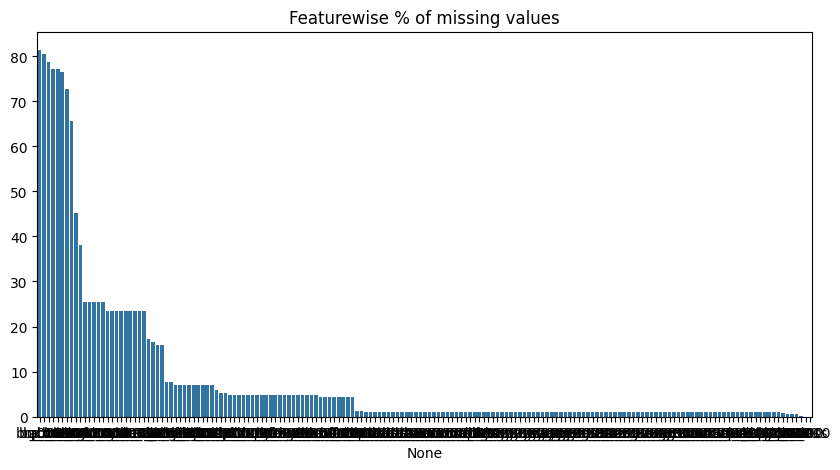

In [13]:
#check for missing values
missing_values = df.isnull().sum().div(df.shape[0]).mul(100).sort_values(ascending=False)

plt.figure(figsize=(10,5))

sns.barplot(x=missing_values.index,y=missing_values.values)
plt.title('Featurewise % of missing values')
plt.show()



In [14]:
#dropping cols with high missing data
drop_cols = missing_values[missing_values>70].index.to_list()

df.drop(columns=drop_cols,inplace=True)

In [15]:
#checking total percent of missing data
missing_values_total = np.sum(df.isnull().sum(),axis=0)/np.product(df.shape)*100

print(f"The total percen of cells having missing values is {round(missing_values_total,2)}%")

The total percen of cells having missing values is 5.37%


In [16]:
#categorising column
cat_cols = df.select_dtypes(include='O').columns.tolist()
num_cols = df.select_dtypes(exclude='O').columns.tolist()

#print columns
print(f"We have {len(num_cols)} numerical columns and they are {num_cols}")
print(f"We have {len(cat_cols)} categorical columns and they are {cat_cols}")

We have 163 numerical columns and they are ['aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002'

The percentage split of target variable is : neg_% = 97.23665303415497 ; pos_% = 2.763346965845032


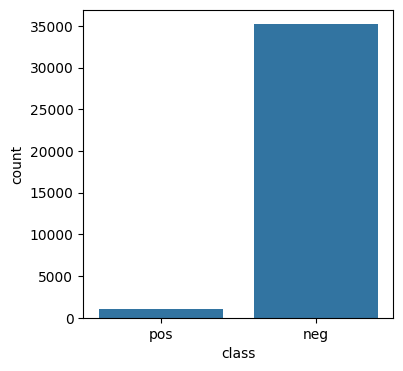

In [17]:
#checking for imbalance in target variable
no_pos = df[df['class']=='pos'].shape[0]/df.shape[0]*100
no_neg = df[df['class']=='neg'].shape[0]/df.shape[0]*100

print(f'The percentage split of target variable is : neg_% = {no_neg} ; pos_% = {no_pos}')
plt.figure(figsize=(4,4))
sns.countplot(x='class',data=df)
plt.show()

In [18]:
#creating accuracy function

def model_metrics(true_val,pred_val):
    '''
    This function takes in the actual and predicted values and return various model evaluation metrics
    Returns : accuracy,recall,precision,f1,auc
    '''
    accuracy = accuracy_score(true_val,pred_val)
    recall = recall_score(true_val,pred_val)
    precision = precision_score(true_val,pred_val)
    f1 = f1_score(true_val,pred_val)
    auc = roc_auc_score(true_val,pred_val)

    return accuracy,recall,precision,f1,auc

In [19]:
# creating function to calculate cost of the model

def total_cost(true_val,pred_val):
    ''' 
    This function returns the total cost incurred due to the predictions of this model
    '''
    tp,fp,tn,fn = confusion_matrix(true_val,pred_val).ravel(   )

    cost = tp*10 + fn*500

    return cost

In [20]:
def evaluate_models(x, y, models):
    ''' 
    x : input data
    y : target variable
    models : list of models to be evaluated
    '''
    # Train test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

    # Initialize dictionary to store results
    results = {
        "Model": [],
        "Train Accuracy": [],
        "Train Recall": [],
        "Train Precision": [],
        "Train F1": [],
        "Train AUC": [],
        "Train Cost": [],
        "Test Accuracy": [],
        "Test Recall": [],
        "Test Precision": [],
        "Test F1": [],
        "Test AUC": [],
        "Test Cost": []
    }

    for model_name, model in models.items():
        # Fit model
        model.fit(x_train, y_train)

        # Predict
        pred_val_train = model.predict(x_train)
        pred_val_test = model.predict(x_test)

        # Checking the accuracy and cost for train data
        model_train_accuracy, model_train_recall, model_train_precision, \
        model_train_f1, model_train_auc = model_metrics(y_train, pred_val_train)

        train_cost = total_cost(y_train, pred_val_train)

        # Checking the accuracy and cost for test data
        model_test_accuracy, model_test_recall, model_test_precision, \
        model_test_f1, model_test_auc = model_metrics(y_test, pred_val_test)

        test_cost = total_cost(y_test, pred_val_test)

        # Append results to dictionary
        results["Model"].append(model_name)
        results["Train Accuracy"].append(model_train_accuracy)
        results["Train Recall"].append(model_train_recall)
        results["Train Precision"].append(model_train_precision)
        results["Train F1"].append(model_train_f1)
        results["Train AUC"].append(model_train_auc)
        results["Train Cost"].append(train_cost)
        results["Test Accuracy"].append(model_test_accuracy)
        results["Test Recall"].append(model_test_recall)
        results["Test Precision"].append(model_test_precision)
        results["Test F1"].append(model_test_f1)
        results["Test AUC"].append(model_test_auc)
        results["Test Cost"].append(test_cost)

        # Print the performance metrics for training data
        print(f'\n{model_name}')
        print('\nModel Performance for Training Data:')
        print(f"Accuracy: {model_train_accuracy:.4f}")
        print(f"Recall: {model_train_recall:.4f}")
        print(f"Precision: {model_train_precision:.4f}")
        print(f"F1 Score: {model_train_f1:.4f}")
        print(f"AUC: {model_train_auc:.4f}")
        print(f"Cost: {train_cost}")

        # Print the performance metrics for test data
        print('\nModel Performance for Test Data:')
        print(f"Accuracy: {model_test_accuracy:.4f}")
        print(f"Recall: {model_test_recall:.4f}")
        print(f"Precision: {model_test_precision:.4f}")
        print(f"F1 Score: {model_test_f1:.4f}")
        print(f"AUC: {model_test_auc:.4f}")
        print(f"Cost: {test_cost}")
        print('#' * 30)

    # Convert results dictionary to DataFrame
    report = pd.DataFrame(results).sort_values(by=['Test Cost'])

    return report



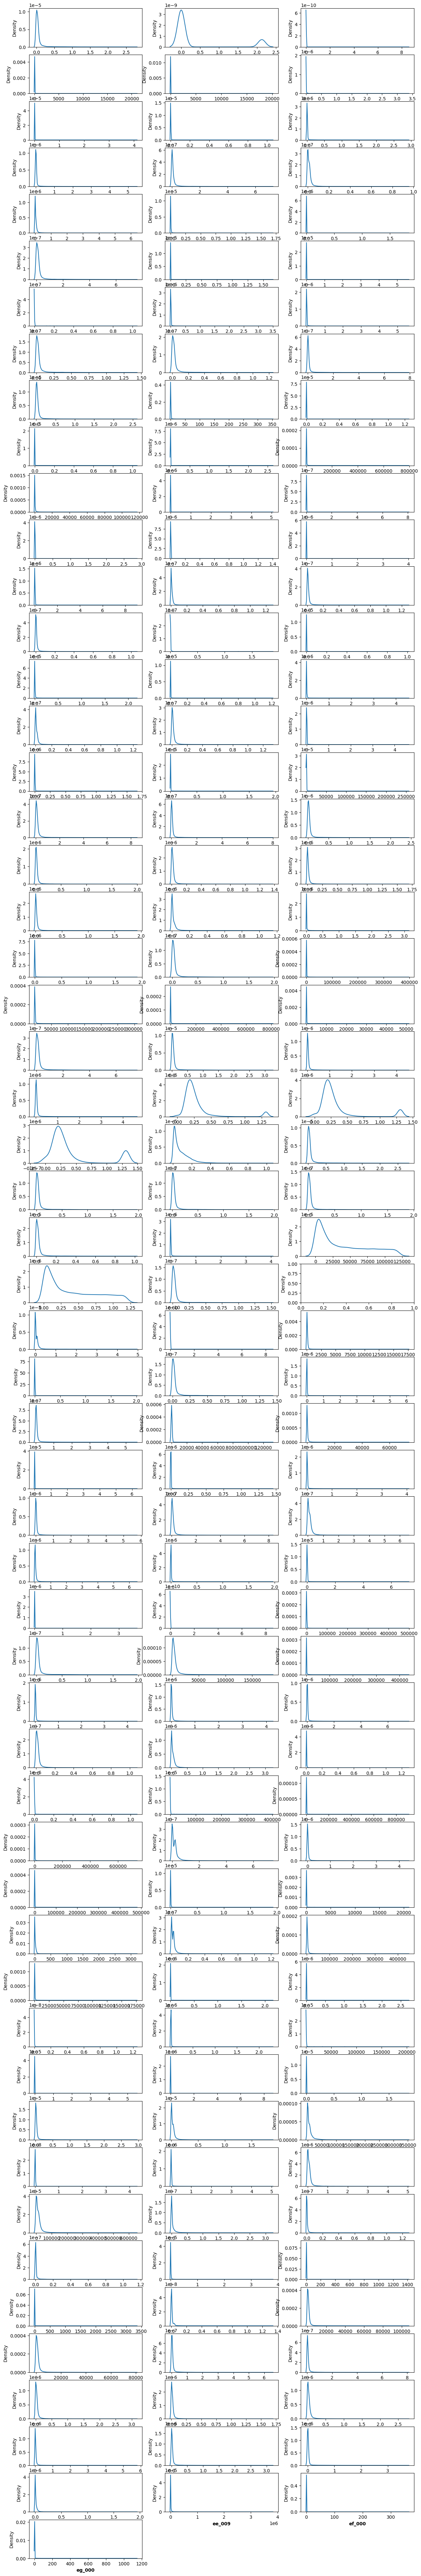

In [21]:
#plot distribution for all independent numerical features
fig,ax = plt.subplots(int(len(num_cols)/3)+1,3,figsize=(15,100))
axes = ax.flatten()
for i,col in enumerate(num_cols):
    sns.kdeplot(x=df[col],ax=axes[i])
    axes[i].set_xlabel(col,weight = 'bold')
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [22]:
#splitting dependent and target variables
x = df.drop(columns=['class'])
y = df['class'].replace({'pos':1,'neg':0})
x.shape, y.shape

((36188, 163), (36188,))

<H2> Experitment for imputation and scaling

<h3>1. Roubust Scaler with KNN imputer

In [23]:
roubust_scaler = RobustScaler()
x1_sc = roubust_scaler.fit_transform(x)

In [24]:
# find the optimal number of neighbours
results = []
neighbours = [3]
for i in neighbours:
    pipeline = Pipeline(steps=[('i',KNNImputer(n_neighbors=i)),('model',LogisticRegression())])
    scores = cross_val_score(pipeline,x1_sc,y,scoring='accuracy',cv=2,n_jobs=1,verbose= 1)
    results.append(scores)
    print(f"For {i} Neighbours ==> Accuracy : {np.mean(scores)}")

results


KeyboardInterrupt: 

In [25]:
pipeline = Pipeline(steps=[('i',KNNImputer(n_neighbors=2)),('model',LogisticRegression())])
scores = cross_val_score(pipeline,x1_sc,y,scoring='accuracy',cv=2,n_jobs=1,verbose= 1)
results.append(scores)

KeyboardInterrupt: 

In [29]:
#Pipeline(steps=[('i',KNNImputer(n_neighbors=2)),('model',LogisticRegression())])
cross_val_score(pipeline,x1_sc,y,scoring='accuracy',cv=2,verbose= 2)

[CV] END .................................................... total time= 5.5min
[CV] END .................................................... total time= 6.5min


array([0.72460484, 0.74466674])